In [121]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from statsmodels.api import Logit

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
matplotlib.rc('font',family = 'Malgun Gothic')

In [2]:
df_raw= pd.read_csv("C:/Users/ych07/B4_반도체공정(Wafer)/데이터셋 초초안.csv")

In [3]:
df_raw

,Unnamed: 0,type,Temp_OXid,ppm,Pressure,Oxid_time,thickness,resist_target,N2_HMDS,pressure_HMDS,...,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target,Chamber,Etching_rate
0,0,dry,1214.307948,26.69,0.203,120,713.132,1.46994,17.367,15.006,...,1.380000e+17,3.010000e+17,6.000000e+17,30795.934,103.433,854.0,154,0,21111,169.78300
1,1,dry,978.110792,30.86,0.217,137,714.295,0.86579,16.090,15.059,...,1.380000e+17,3.030000e+17,6.000000e+17,32135.618,105.552,895.0,156,0,21122,171.94875
2,2,dry,1176.019149,31.07,0.218,116,710.114,0.90483,19.026,14.930,...,1.380000e+17,2.980000e+17,6.000000e+17,31057.895,102.598,898.0,152,0,21133,167.25350
3,3,dry,933.442733,31.04,0.196,143,710.617,0.42197,18.891,14.947,...,1.380000e+17,3.000000e+17,6.000000e+17,32140.566,102.963,879.0,155,0,21111,169.45425
4,4,wet,1140.598752,31.37,0.215,76,711.632,1.70139,13.788,14.820,...,1.380000e+17,3.020000e+17,6.000000e+17,31986.009,101.419,882.0,155,0,21122,172.43300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,1699,wet,1275.182502,45.10,0.214,21,715.498,0.89644,16.029,15.005,...,1.380000e+17,3.010000e+17,6.000000e+17,32248.621,101.503,868.0,152,0,33333,174.44950
1700,1700,wet,1268.105427,45.07,0.215,22,707.179,1.02384,17.587,14.949,...,1.870000e+17,3.010000e+17,6.000000e+17,32241.426,101.061,867.0,152,0,11133,172.29475
1701,1701,wet,1279.160563,45.12,0.214,21,712.946,1.02634,16.445,14.978,...,1.380000e+17,2.990000e+17,6.000000e+17,32245.574,101.506,868.0,152,0,11222,174.68650
1702,1702,wet,1272.804948,45.34,0.213,20,711.987,0.56833,15.306,15.050,...,1.380000e+17,2.990000e+17,6.000000e+17,32259.412,101.360,868.0,152,0,11311,174.82175


In [5]:
df_raw.drop('Unnamed: 0',axis = 1, inplace = True)

In [13]:
df_raw.drop('Chamber',axis = 1, inplace = True)

In [14]:
df_raw

,type,Temp_OXid,ppm,Pressure,Oxid_time,thickness,resist_target,N2_HMDS,pressure_HMDS,temp_HMDS,...,Flux90s,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target,Etching_rate
0,dry,1214.307948,26.69,0.203,120,713.132,1.46994,17.367,15.006,20.001,...,1.320000e+17,1.380000e+17,3.010000e+17,6.000000e+17,30795.934,103.433,854.0,154,0,169.78300
1,dry,978.110792,30.86,0.217,137,714.295,0.86579,16.090,15.059,19.993,...,4.370000e+16,1.380000e+17,3.030000e+17,6.000000e+17,32135.618,105.552,895.0,156,0,171.94875
2,dry,1176.019149,31.07,0.218,116,710.114,0.90483,19.026,14.930,19.995,...,1.510000e+16,1.380000e+17,2.980000e+17,6.000000e+17,31057.895,102.598,898.0,152,0,167.25350
3,dry,933.442733,31.04,0.196,143,710.617,0.42197,18.891,14.947,20.004,...,1.020000e+17,1.380000e+17,3.000000e+17,6.000000e+17,32140.566,102.963,879.0,155,0,169.45425
4,wet,1140.598752,31.37,0.215,76,711.632,1.70139,13.788,14.820,19.998,...,7.880000e+16,1.380000e+17,3.020000e+17,6.000000e+17,31986.009,101.419,882.0,155,0,172.43300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,wet,1275.182502,45.10,0.214,21,715.498,0.89644,16.029,15.005,19.998,...,9.510000e+16,1.380000e+17,3.010000e+17,6.000000e+17,32248.621,101.503,868.0,152,0,174.44950
1700,wet,1268.105427,45.07,0.215,22,707.179,1.02384,17.587,14.949,20.000,...,5.430000e+16,1.870000e+17,3.010000e+17,6.000000e+17,32241.426,101.061,867.0,152,0,172.29475
1701,wet,1279.160563,45.12,0.214,21,712.946,1.02634,16.445,14.978,19.994,...,9.240000e+16,1.380000e+17,2.990000e+17,6.000000e+17,32245.574,101.506,868.0,152,0,174.68650
1702,wet,1272.804948,45.34,0.213,20,711.987,0.56833,15.306,15.050,20.002,...,2.790000e+16,1.380000e+17,2.990000e+17,6.000000e+17,32259.412,101.360,868.0,152,0,174.82175


In [17]:
for i in df_raw.columns :
    print(i, end = ' + ')

type + Temp_OXid + ppm + Pressure + Oxid_time + thickness + resist_target + N2_HMDS + pressure_HMDS + temp_HMDS + temp_HMDS_bake + time_HMDS_bake + spin1 + spin2 + spin3 + photoresist_bake + temp_softbake + time_softbake + Line_CD + Wavelength + Resolution + Energy_Exposure + Temp_Etching + Source_Power + Selectivity + Flux60s + Flux90s + Flux160s + Flux480s + Flux840s + input_Energy + Temp_implantation + Furance_Temp + RTA_Temp + Target + Etching_rate + 

In [12]:
df_raw.head()

,type,Temp_OXid,ppm,Pressure,Oxid_time,thickness,resist_target,N2_HMDS,pressure_HMDS,temp_HMDS,...,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target,Chamber,Etching_rate
0,dry,1214.307948,26.69,0.203,120,713.132,1.46994,17.367,15.006,20.001,...,1.380000e+17,3.010000e+17,6.000000e+17,30795.934,103.433,854.0,154,0,21111,169.78300
1,dry,978.110792,30.86,0.217,137,714.295,0.86579,16.090,15.059,19.993,...,1.380000e+17,3.030000e+17,6.000000e+17,32135.618,105.552,895.0,156,0,21122,171.94875
2,dry,1176.019149,31.07,0.218,116,710.114,0.90483,19.026,14.930,19.995,...,1.380000e+17,2.980000e+17,6.000000e+17,31057.895,102.598,898.0,152,0,21133,167.25350
3,dry,933.442733,31.04,0.196,143,710.617,0.42197,18.891,14.947,20.004,...,1.380000e+17,3.000000e+17,6.000000e+17,32140.566,102.963,879.0,155,0,21111,169.45425
4,wet,1140.598752,31.37,0.215,76,711.632,1.70139,13.788,14.820,19.998,...,1.380000e+17,3.020000e+17,6.000000e+17,31986.009,101.419,882.0,155,0,21122,172.43300


In [16]:
df_train, df_test = train_test_split(df_raw, test_size = 0.3, random_state = 1234)

print(df_train.shape)
print(df_test.shape)

(1192, 36)
(512, 36)


In [19]:
log_model = Logit.from_formula('Target ~ C(type) + Temp_OXid + ppm + Pressure + Oxid_time + thickness + resist_target + N2_HMDS + pressure_HMDS + temp_HMDS + temp_HMDS_bake + time_HMDS_bake + spin1 + spin2 + spin3 + photoresist_bake + temp_softbake + time_softbake + Line_CD + Wavelength + Resolution + Energy_Exposure + Temp_Etching + Source_Power + Selectivity + Flux60s + Flux90s + Flux160s + Flux480s + Flux840s + input_Energy + Temp_implantation + Furance_Temp + RTA_Temp + Etching_rate',df_train)

log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.157348
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1192
Model:                          Logit   Df Residuals:                     1156
Method:                           MLE   Df Model:                           35
Date:                Tue, 07 Sep 2021   Pseudo R-squ.:                  0.3663
Time:                        20:36:39   Log-Likelihood:                -187.56
converged:                       True   LL-Null:                       -295.99
Covariance Type:            nonrobust   LLR p-value:                 4.246e-28
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0004   6.48e+06   5.65e-11      1.000   -1.27e+07    1.27e+07
C(type)

In [24]:
y_pred = log_result.predict(df_test)
y_pred_class = (y_pred > 0.5).astype(int)
y_pred_class.shape

(512,)

In [25]:
print(accuracy_score(df_test['Target'], y_pred_class))
print(confusion_matrix(df_test['Target'], y_pred_class))
print(classification_report(df_test['Target'],y_pred_class))

0.94140625
[[468   8]
 [ 22  14]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       476
           1       0.64      0.39      0.48        36

    accuracy                           0.94       512
   macro avg       0.80      0.69      0.73       512
weighted avg       0.93      0.94      0.93       512



In [27]:
df_char = df_raw.select_dtypes(include = 'object')
df_numeric = df_raw.select_dtypes(exclude = 'object')

scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_numeric.columns)

df_scaled = pd.concat([df_numeric_scaled, df_char], axis = 1)
df_scaled.head()

,Temp_OXid,ppm,Pressure,Oxid_time,thickness,resist_target,N2_HMDS,pressure_HMDS,temp_HMDS,temp_HMDS_bake,...,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target,Etching_rate,type
0,0.966989,-0.835071,-0.838218,0.295654,0.264352,0.668555,0.577144,0.030829,0.407538,0.004254,...,0.001568,0.684353,0.0,-2.061184,0.164306,-2.552142,-0.287763,-0.271522,-0.152828,dry
1,-0.610329,-0.318737,0.676556,0.531611,0.409888,-0.784862,0.007975,0.712905,-1.771968,-0.245492,...,0.001568,2.373185,0.0,0.217279,1.445553,-0.331856,0.539130,-0.271522,0.424420,dry
2,0.711297,-0.292735,0.784754,0.240135,-0.113314,-0.690942,1.316573,-0.947242,-1.227091,0.550835,...,0.001568,-1.848894,0.0,-1.615654,-0.340574,-0.169396,-1.114655,-0.271522,-0.827028,dry
3,-0.908621,-0.296449,-1.595605,0.614889,-0.050370,-1.852569,1.256402,-0.728463,1.224853,-2.047779,...,0.001568,-0.160062,0.0,0.225694,-0.119878,-1.198309,0.125684,-0.271522,-0.240452,dry
4,0.474761,-0.255588,0.460160,-0.315057,0.076645,1.225359,-1.018043,-2.362872,-0.409777,0.576647,...,0.001568,1.528769,0.0,-0.037168,-1.053452,-1.035849,0.125684,-0.271522,0.553489,wet


In [30]:
df_scaled['Target'] = np.where(df_scaled['Target'] > 0, 1, 0)
df_scaled

,Temp_OXid,ppm,Pressure,Oxid_time,thickness,resist_target,N2_HMDS,pressure_HMDS,temp_HMDS,temp_HMDS_bake,...,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target,Etching_rate,type
0,0.966989,-0.835071,-0.838218,0.295654,0.264352,0.668555,0.577144,0.030829,0.407538,0.004254,...,0.001568,0.684353,0.0,-2.061184,0.164306,-2.552142,-0.287763,0,-0.152828,dry
1,-0.610329,-0.318737,0.676556,0.531611,0.409888,-0.784862,0.007975,0.712905,-1.771968,-0.245492,...,0.001568,2.373185,0.0,0.217279,1.445553,-0.331856,0.539130,0,0.424420,dry
2,0.711297,-0.292735,0.784754,0.240135,-0.113314,-0.690942,1.316573,-0.947242,-1.227091,0.550835,...,0.001568,-1.848894,0.0,-1.615654,-0.340574,-0.169396,-1.114655,0,-0.827028,dry
3,-0.908621,-0.296449,-1.595605,0.614889,-0.050370,-1.852569,1.256402,-0.728463,1.224853,-2.047779,...,0.001568,-0.160062,0.0,0.225694,-0.119878,-1.198309,0.125684,0,-0.240452,dry
4,0.474761,-0.255588,0.460160,-0.315057,0.076645,1.225359,-1.018043,-2.362872,-0.409777,0.576647,...,0.001568,1.528769,0.0,-0.037168,-1.053452,-1.035849,0.125684,0,0.553489,wet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,1.373507,1.444476,0.351961,-1.078445,0.560429,-0.711126,-0.019213,0.017960,-0.409777,1.356929,...,0.001568,0.684353,0.0,0.409469,-1.002662,-1.793996,-1.114655,0,1.090957,wet
1700,1.326247,1.440762,0.460160,-1.064565,-0.480594,-0.404637,0.675199,-0.702725,0.135100,1.300073,...,1.120850,0.684353,0.0,0.397232,-1.269916,-1.848149,-1.114655,0,0.516641,wet
1701,1.400073,1.446953,0.351961,-1.078445,0.241077,-0.398623,0.166202,-0.329513,-1.499529,0.998355,...,0.001568,-1.004478,0.0,0.404286,-1.000848,-1.793996,-1.114655,0,1.154126,wet
1702,1.357630,1.474193,0.243763,-1.092325,0.121069,-1.500467,-0.341459,0.597081,0.679976,1.092184,...,0.001568,-1.004478,0.0,0.427821,-1.089126,-1.793996,-1.114655,0,1.190175,wet


In [46]:
df_scaled['Flux840s'].value_counts()

0.0    1704
Name: Flux840s, dtype: int64

In [31]:
df_scaled_train, df_scaled_test = train_test_split(df_scaled, test_size = 0.3, random_state = 1234)

print(df_scaled_train.shape)
print(df_scaled_test.shape)

(1192, 36)
(512, 36)


In [47]:
scaled_log_model = Logit.from_formula('Target ~ C(type) + Temp_OXid + ppm + Pressure + Oxid_time + thickness + resist_target + N2_HMDS + pressure_HMDS + temp_HMDS + temp_HMDS_bake + time_HMDS_bake + spin1 + spin2 + spin3 + photoresist_bake + temp_softbake + time_softbake + Line_CD + Wavelength + Resolution + Energy_Exposure + Temp_Etching + Source_Power + Selectivity + Flux60s + Flux90s + Flux160s + Flux480s + input_Energy + Temp_implantation + Furance_Temp + RTA_Temp + Etching_rate',df_scaled_train)

scaled_log_result = scaled_log_model.fit()
print(scaled_log_result.summary())

Optimization terminated successfully.
         Current function value: 0.157348
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1192
Model:                          Logit   Df Residuals:                     1157
Method:                           MLE   Df Model:                           34
Date:                Tue, 07 Sep 2021   Pseudo R-squ.:                  0.3663
Time:                        20:55:18   Log-Likelihood:                -187.56
converged:                       True   LL-Null:                       -295.99
Covariance Type:            nonrobust   LLR p-value:                 1.660e-28
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.8124      0.299    -12.745      0.000      -4.399      -3.226
C(type)[

In [54]:
matplotlib.rcParams['axes.unicode_minus'] = False

In [64]:
df_log_scaled_coef.sort_values(by = 'Coef')

,Coef
Etching_rate,-2.202039
C(type)[T.wet],-0.923660
temp_softbake,-0.375713
Flux60s,-0.318916
Oxid_time,-0.277967
Energy_Exposure,-0.274771
ppm,-0.222417
Temp_OXid,-0.209459
time_HMDS_bake,-0.208121
Flux160s,-0.203205


<AxesSubplot:>

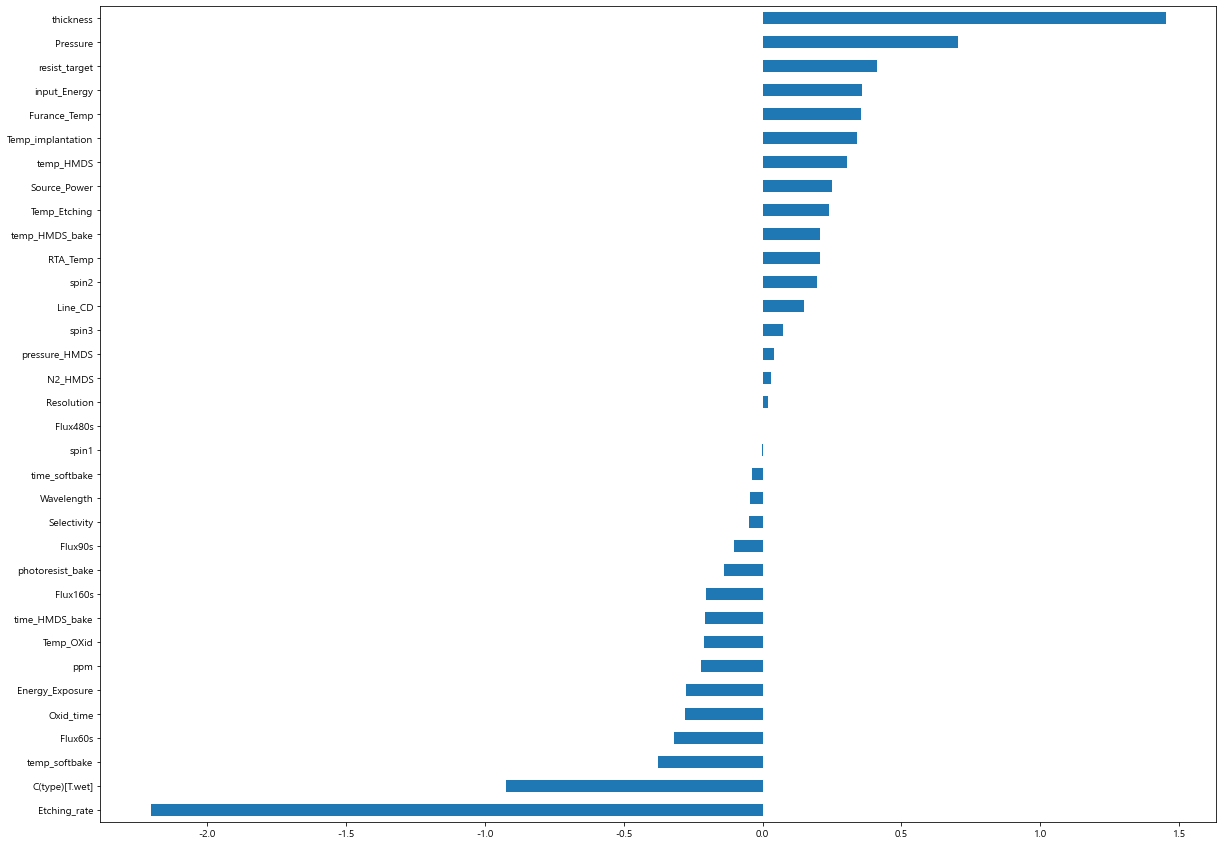

In [66]:
df_log_scaled_coef.sort_values(by = 'Coef').plot.barh(y = 'Coef', legend = False, figsize = (20,15))

<AxesSubplot:>

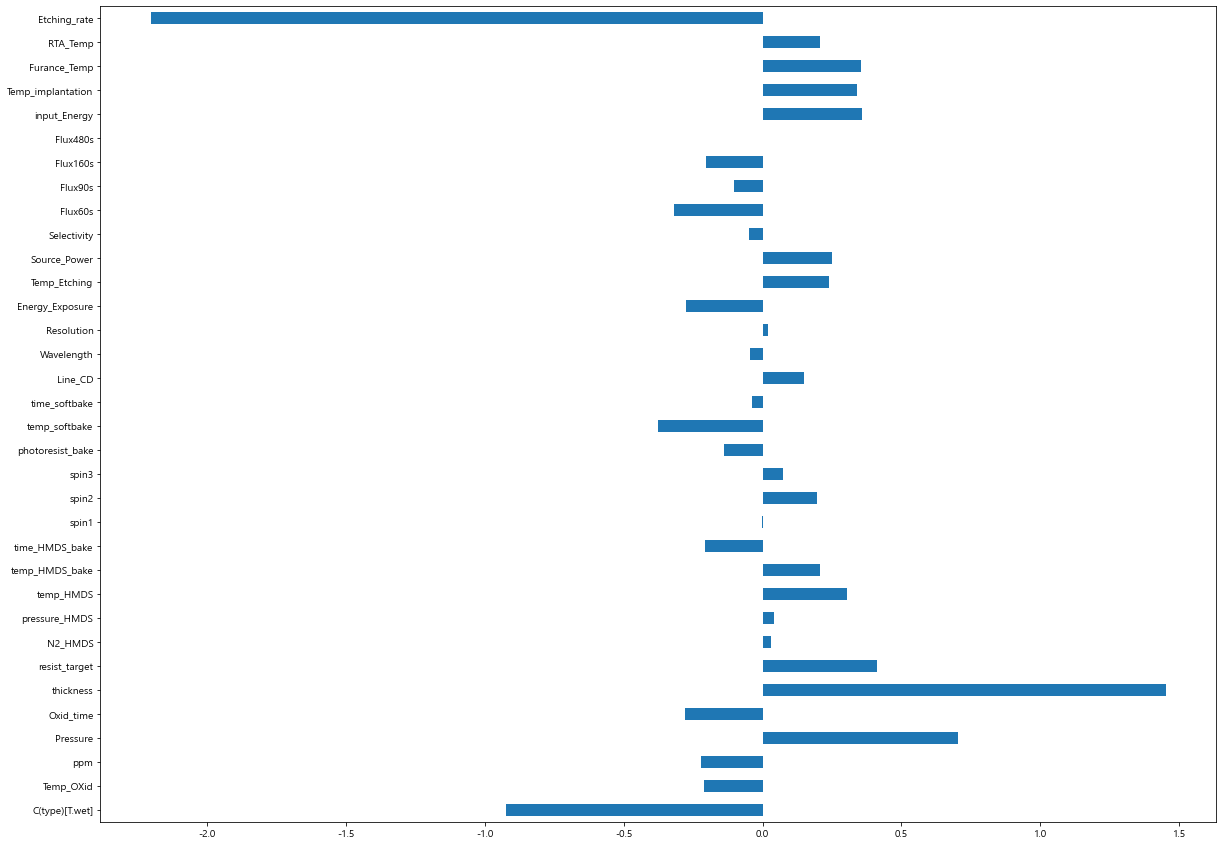

In [55]:
df_log_scaled_coef = pd.DataFrame({'Coef' : scaled_log_result.params.values[1:]}, index = scaled_log_model.exog_names[1:])
df_log_scaled_coef.plot.barh(y = 'Coef', legend = False, figsize = (20,15))

In [56]:
y_pred = scaled_log_result.predict(df_scaled_test)
y_pred_class = (y_pred > 0.5).astype(int)
y_pred_class.shape

(512,)

In [57]:
print(accuracy_score(df_scaled_test['Target'], y_pred_class))
print(confusion_matrix(df_scaled_test['Target'], y_pred_class))
print(classification_report(df_scaled_test['Target'],y_pred_class))

0.94140625
[[468   8]
 [ 22  14]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       476
           1       0.64      0.39      0.48        36

    accuracy                           0.94       512
   macro avg       0.80      0.69      0.73       512
weighted avg       0.93      0.94      0.93       512



In [67]:
scaled_log_model = Logit.from_formula('Target ~ C(type) + Temp_OXid + ppm + Pressure + Oxid_time + thickness + resist_target + temp_HMDS + temp_HMDS_bake + time_HMDS_bake + spin2 + photoresist_bake + temp_softbake + Line_CD +  Energy_Exposure + Temp_Etching + Source_Power + Flux60s + Flux160s + input_Energy + Temp_implantation + Furance_Temp + RTA_Temp + Etching_rate',df_scaled_train)

scaled_log_result = scaled_log_model.fit()
print(scaled_log_result.summary())

Optimization terminated successfully.
         Current function value: 0.157768
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                 1192
Model:                          Logit   Df Residuals:                     1167
Method:                           MLE   Df Model:                           24
Date:                Tue, 07 Sep 2021   Pseudo R-squ.:                  0.3646
Time:                        21:06:52   Log-Likelihood:                -188.06
converged:                       True   LL-Null:                       -295.99
Covariance Type:            nonrobust   LLR p-value:                 8.646e-33
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.8091      0.295    -12.906      0.000      -4.388      -3.231
C(type)[

In [69]:
y_pred = scaled_log_result.predict(df_scaled_test)
y_pred_class = (y_pred > 0.5).astype(int)
y_pred_class.shape

(512,)

In [70]:
print(accuracy_score(df_scaled_test['Target'], y_pred_class))
print(confusion_matrix(df_scaled_test['Target'], y_pred_class))
print(classification_report(df_scaled_test['Target'],y_pred_class))

0.94140625
[[469   7]
 [ 23  13]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       476
           1       0.65      0.36      0.46        36

    accuracy                           0.94       512
   macro avg       0.80      0.67      0.72       512
weighted avg       0.93      0.94      0.93       512



<AxesSubplot:>

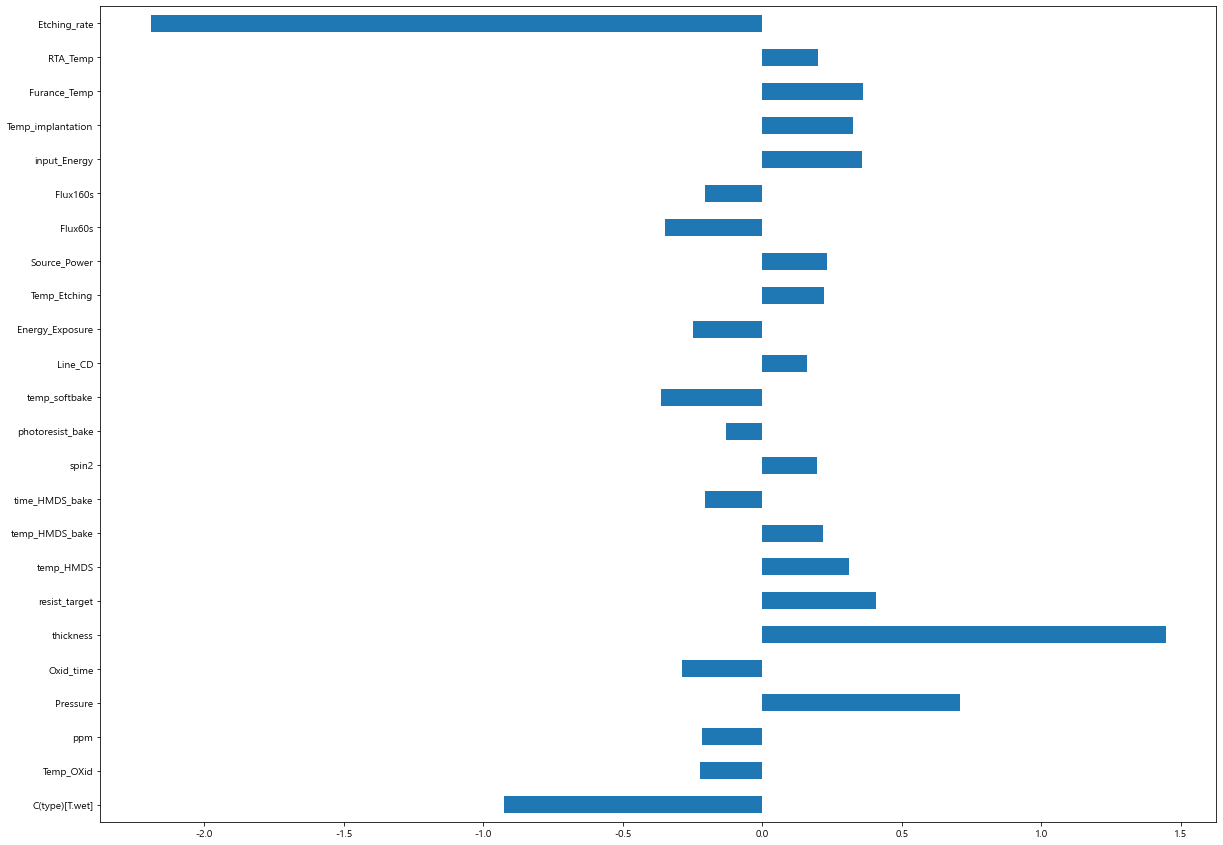

In [71]:
df_log_scaled_coef = pd.DataFrame({'Coef' : scaled_log_result.params.values[1:]}, index = scaled_log_model.exog_names[1:])
df_log_scaled_coef.plot.barh(y = 'Coef', legend = False, figsize = (20,15))

# SVC

In [81]:
df_dummy = pd.get_dummies(df_raw)

In [82]:
df_raw_y = df_dummy['Target']
df_raw_x = df_dummy.drop('Target', axis = 1, inplace = False)

In [83]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)

print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))

train data X size : (1192, 36)
train data Y size : (1192,)
test data X size : (512, 36)
test data Y size : (512,)


In [84]:
svm_uncustomized = SVC(random_state = 1234)
svm_uncustomized.fit(df_train_x, df_train_y)

print(svm_uncustomized.score(df_train_x, df_train_y))
print(svm_uncustomized.score(df_test_x, df_test_y))

0.9320469798657718
0.9296875


In [85]:
y_pred = svm_uncustomized.predict(df_test_x)

print('Accuracy : {0:.3f}\n'.format(svm_uncustomized.score(df_test_x, df_test_y)))
print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))

print(classification_report(df_test_y, y_pred, digits =3))

Accuracy : 0.930

Confusion matrix : 
[[476   0]
 [ 36   0]]
              precision    recall  f1-score   support

           0      0.930     1.000     0.964       476
           1      0.000     0.000     0.000        36

    accuracy                          0.930       512
   macro avg      0.465     0.500     0.482       512
weighted avg      0.864     0.930     0.896       512



C:\Users\ych07\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ych07\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ych07\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
train_accuracy = []
test_accuracy = []
para_c = [10**c for c in range(-2,2)]

for v_C in para_c :
    svm = SVC(random_state = 1234, C = v_C)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))
    
df_accuracy_c = pd.DataFrame()
df_accuracy_c['C'] = para_c
df_accuracy_c['TrainAccuracy'] = train_accuracy
df_accuracy_c['TestAccuracy'] = test_accuracy

df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.932,0.93
1,0.10,0.932,0.93
2,1.00,0.932,0.93
3,10.00,0.932,0.93


In [87]:
v_feature_name = df_train_x.columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,Temp_OXid,ppm,Pressure,Oxid_time,thickness,resist_target,N2_HMDS,pressure_HMDS,temp_HMDS,temp_HMDS_bake,...,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Etching_rate,type_dry,type_wet
0,0.966989,-0.835071,-0.838218,0.295654,0.264352,0.668555,0.577144,0.030829,0.407538,0.004254,...,0.001568,0.684353,0.0,-2.061184,0.164306,-2.552142,-0.287763,-0.152828,0.849242,-0.849242
1,-0.610329,-0.318737,0.676556,0.531611,0.409888,-0.784862,0.007975,0.712905,-1.771968,-0.245492,...,0.001568,2.373185,0.0,0.217279,1.445553,-0.331856,0.539130,0.424420,0.849242,-0.849242
2,0.711297,-0.292735,0.784754,0.240135,-0.113314,-0.690942,1.316573,-0.947242,-1.227091,0.550835,...,0.001568,-1.848894,0.0,-1.615654,-0.340574,-0.169396,-1.114655,-0.827028,0.849242,-0.849242
3,-0.908621,-0.296449,-1.595605,0.614889,-0.050370,-1.852569,1.256402,-0.728463,1.224853,-2.047779,...,0.001568,-0.160062,0.0,0.225694,-0.119878,-1.198309,0.125684,-0.240452,0.849242,-0.849242
4,0.474761,-0.255588,0.460160,-0.315057,0.076645,1.225359,-1.018043,-2.362872,-0.409777,0.576647,...,0.001568,1.528769,0.0,-0.037168,-1.053452,-1.035849,0.125684,0.553489,-1.177521,1.177521


In [94]:
df_train_x, df_test_x = train_test_split(df_scaled, test_size = 0.3, random_state = 1234)

print('train data X size : {}'.format(df_scaled_train_x.shape))
print('test data X size : {}'.format(df_scaled_test_x.shape))

train data X size : (1192, 36)
test data X size : (512, 36)


In [95]:
svm_scaled = SVC(random_state = 1234)
svm_scaled.fit(df_train_x, df_train_y)

print(svm_scaled.score(df_train_x, df_train_y))
print(svm_scaled.score(df_test_x, df_test_y))

0.9546979865771812
0.94140625


In [96]:
y_pred = svm_scaled.predict(df_test_x)

print('Accuracy : {0:.3f}\n'.format(svm_scaled.score(df_test_x, df_test_y)))
print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))

print(classification_report(df_test_y, y_pred, digits =3))

Accuracy : 0.941

Confusion matrix : 
[[476   0]
 [ 30   6]]
              precision    recall  f1-score   support

           0      0.941     1.000     0.969       476
           1      1.000     0.167     0.286        36

    accuracy                          0.941       512
   macro avg      0.970     0.583     0.628       512
weighted avg      0.945     0.941     0.921       512



In [98]:
train_accuracy = []
test_accuracy = []
para_c = [10**c for c in range(-2,3)]

for v_C in para_c :
    svm = SVC(random_state = 1234, C = v_C)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))
    
df_accuracy_c = pd.DataFrame()
df_accuracy_c['C'] = para_c
df_accuracy_c['TrainAccuracy'] = train_accuracy
df_accuracy_c['TestAccuracy'] = test_accuracy

df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.932,0.930
1,0.10,0.932,0.930
2,1.00,0.955,0.941
3,10.00,0.999,0.967
4,100.00,1.000,0.967


In [99]:
train_accuracy = []
test_accuracy = []
para_gamma = [10**c for c in range(-2,3)]

for v_gamma in para_gamma :
    svm = SVC(random_state = 1234, C = 10, gamma = v_gamma)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))
    
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma['Gamma'] = para_gamma
df_accuracy_gamma['TrainAccuracy'] = train_accuracy
df_accuracy_gamma['TestAccuracy'] = test_accuracy

df_accuracy_gamma.round(3)

,Gamma,TrainAccuracy,TestAccuracy
0,0.01,0.987,0.957
1,0.10,1.000,0.953
2,1.00,1.000,0.932
3,10.00,1.000,0.932
4,100.00,1.000,0.930


In [100]:
svc_final = SVC(gamma = 0.1, C = 10, random_state = 1234)
svc_final.fit(df_train_x, df_train_y)
y_pred = svc_final.predict(df_test_x)

print('Accuracy : {0:.3f}\n'.format(svc_final.score(df_test_x, df_test_y)))
print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))

print(classification_report(df_test_y, y_pred, digits =3))

Accuracy : 0.953

Confusion matrix : 
[[473   3]
 [ 21  15]]
              precision    recall  f1-score   support

           0      0.957     0.994     0.975       476
           1      0.833     0.417     0.556        36

    accuracy                          0.953       512
   macro avg      0.895     0.705     0.765       512
weighted avg      0.949     0.953     0.946       512



In [105]:
small = df_raw[['Etching_rate','thickness','ppm','Resolution','Selectivity','RTA_Temp','Temp_OXid','Line_CD','input_Energy','Temp_Etching','Target']]

In [107]:
df_raw_y = small['Target']
df_raw_x = small.drop('Target', axis = 1, inplace = False)

In [108]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)

print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))

train data X size : (1192, 10)
train data Y size : (1192,)
test data X size : (512, 10)
test data Y size : (512,)


In [112]:
v_feature_name = df_train_x.columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,Etching_rate,thickness,ppm,Resolution,Selectivity,RTA_Temp,Temp_OXid,Line_CD,input_Energy,Temp_Etching
0,-0.152828,0.264352,-0.835071,-0.321115,-0.159833,-0.287763,0.966989,0.072474,-2.061184,1.876348
1,0.424420,0.409888,-0.318737,0.992307,0.328916,0.539130,-0.610329,1.084916,0.217279,-1.110114
2,-0.827028,-0.113314,-0.292735,0.647834,-1.687173,-1.114655,0.711297,0.574793,-1.615654,0.097499
3,-0.240452,-0.050370,-0.296449,0.847644,-0.465301,0.125684,-0.908621,-0.676763,0.225694,0.177672
4,0.553489,0.076645,-0.255588,0.284388,0.328916,0.125684,0.474761,1.403679,-0.037168,2.292248


In [113]:
df_train_x, df_test_x = train_test_split(df_scaled, test_size = 0.3, random_state = 1234)

print('train data X size : {}'.format(df_scaled_train_x.shape))
print('test data X size : {}'.format(df_scaled_test_x.shape))

train data X size : (1192, 36)
test data X size : (512, 36)


In [114]:
svm_scaled = SVC(random_state = 1234)
svm_scaled.fit(df_train_x, df_train_y)

print(svm_scaled.score(df_train_x, df_train_y))
print(svm_scaled.score(df_test_x, df_test_y))

0.9454697986577181
0.943359375


In [115]:
y_pred = svm_scaled.predict(df_test_x)

print('Accuracy : {0:.3f}\n'.format(svm_scaled.score(df_test_x, df_test_y)))
print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))

print(classification_report(df_test_y, y_pred, digits =3))

Accuracy : 0.943

Confusion matrix : 
[[476   0]
 [ 29   7]]
              precision    recall  f1-score   support

           0      0.943     1.000     0.970       476
           1      1.000     0.194     0.326        36

    accuracy                          0.943       512
   macro avg      0.971     0.597     0.648       512
weighted avg      0.947     0.943     0.925       512



In [116]:
train_accuracy = []
test_accuracy = []
para_c = [10**c for c in range(-2,3)]

for v_C in para_c :
    svm = SVC(random_state = 1234, C = v_C)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))
    
df_accuracy_c = pd.DataFrame()
df_accuracy_c['C'] = para_c
df_accuracy_c['TrainAccuracy'] = train_accuracy
df_accuracy_c['TestAccuracy'] = test_accuracy

df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.932,0.930
1,0.10,0.932,0.930
2,1.00,0.945,0.943
3,10.00,0.976,0.951
4,100.00,0.994,0.959


In [117]:
train_accuracy = []
test_accuracy = []
para_gamma = [10**c for c in range(-2,3)]

for v_gamma in para_gamma :
    svm = SVC(random_state = 1234, C = 10, gamma = v_gamma)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))
    
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma['Gamma'] = para_gamma
df_accuracy_gamma['TrainAccuracy'] = train_accuracy
df_accuracy_gamma['TestAccuracy'] = test_accuracy

df_accuracy_gamma.round(3)

,Gamma,TrainAccuracy,TestAccuracy
0,0.01,0.938,0.938
1,0.10,0.976,0.951
2,1.00,0.999,0.975
3,10.00,1.000,0.953
4,100.00,1.000,0.938


In [143]:
svc_final = SVC(gamma = 1, C = 10, random_state = 1234)
svc_final.fit(df_train_x, df_train_y)
y_pred = svc_final.predict(df_test_x)


print('Accuracy on training set : {:.3f}'.format(svc_final.score(df_scaled_train_x, df_train_y)))
print('Accuracy on test set : {:.3f}\n'.format(svc_final.score(df_scaled_test_x, df_test_y)))
print('Accuracy : {0:.3f}\n'.format(svc_final.score(df_test_x, df_test_y)))
print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))

print(classification_report(df_test_y, y_pred, digits =3))

Accuracy on training set : 0.932
Accuracy on test set : 0.930

Accuracy : 0.930

Confusion matrix : 
[[476   0]
 [ 36   0]]
              precision    recall  f1-score   support

           0      0.930     1.000     0.964       476
           1      0.000     0.000     0.000        36

    accuracy                          0.930       512
   macro avg      0.465     0.500     0.482       512
weighted avg      0.864     0.930     0.896       512



C:\Users\ych07\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ych07\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ych07\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# ANN

In [119]:
df_raw_y = small['Target']
df_raw_x = small.drop('Target', axis = 1, inplace = False)

In [120]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)

print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))

train data X size : (1192, 10)
train data Y size : (1192,)
test data X size : (512, 10)
test data Y size : (512,)


In [122]:
nn_uncustomized = MLPClassifier(random_state = 1234)
nn_uncustomized.fit(df_train_x, df_train_y)

print('Accuracy on training set : {:.3f}'.format(nn_uncustomized.score(df_train_x, df_train_y)))
print('Accuracy on test set : {:.3f}'.format(nn_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 0.932
Accuracy on test set : 0.930


In [123]:
nn_final = MLPClassifier(hidden_layer_sizes = 120, activation = 'tanh')
nn_final.fit(df_train_x, df_train_y)
y_pred = nn_final.predict(df_test_x)

print('Accuracy on training set : {:.3f}'.format(nn_final.score(df_train_x, df_train_y)))
print('Accuracy on test set : {:.3f}\n'.format(nn_final.score(df_test_x, df_test_y)))
print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits =3))

Accuracy on training set : 0.932
Accuracy on test set : 0.930

Confusion matrix : 
[[476   0]
 [ 36   0]]
              precision    recall  f1-score   support

           0      0.930     1.000     0.964       476
           1      0.000     0.000     0.000        36

    accuracy                          0.930       512
   macro avg      0.465     0.500     0.482       512
weighted avg      0.864     0.930     0.896       512



C:\Users\ych07\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ych07\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ych07\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [124]:
train_accuracy = []
test_accuracy = []
para_hidden = [20 * hidden for hidden in range(1, 9)]

for v_hidden in para_hidden :
    nn = MLPClassifier(random_state = 1234, hidden_layer_sizes = v_hidden)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))
    
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden['HiddenLayer'] = para_hidden
df_accuracy_hidden['TrainAccuracy'] = train_accuracy
df_accuracy_hidden['TestAccuracy'] = test_accuracy

df_accuracy_hidden.round(3)

,HiddenLayer,TrainAccuracy,TestAccuracy
0,20,0.932,0.93
1,40,0.932,0.93
2,60,0.932,0.93
3,80,0.932,0.93
4,100,0.932,0.93
5,120,0.932,0.93
6,140,0.932,0.93
7,160,0.932,0.93


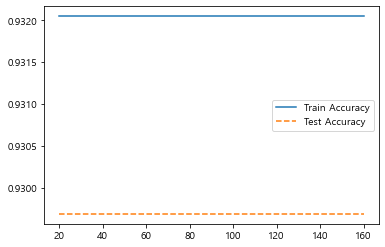

In [125]:
plt.plot(para_hidden, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_hidden, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.legend()

In [126]:
train_accuracy = []
test_accuracy = []
para_hidden = [20 * hidden for hidden in range(1, 9)]

for v_hidden in para_hidden :
    nn = MLPClassifier(random_state = 1234, hidden_layer_sizes = (v_hidden, v_hidden))
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))
    
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden['HiddenLayer'] = para_hidden
df_accuracy_hidden['TrainAccuracy'] = train_accuracy
df_accuracy_hidden['TestAccuracy'] = test_accuracy

df_accuracy_hidden.round(3)

,HiddenLayer,TrainAccuracy,TestAccuracy
0,20,0.932,0.930
1,40,0.932,0.930
2,60,0.932,0.930
3,80,0.932,0.930
4,100,0.932,0.930
5,120,0.497,0.512
6,140,0.932,0.930
7,160,0.932,0.930


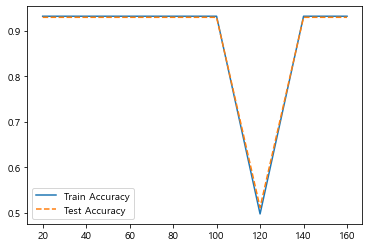

In [127]:
plt.plot(para_hidden, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_hidden, test_accuracy, linestyle = '--', label = 'Test Accuracy')
plt.legend()

In [128]:
train_accuracy = []
test_accuracy = []
para_function = ['logistic', 'tanh', 'relu']

for v_function in para_function :
    nn = MLPClassifier(random_state = 1234, activation = v_function)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))
    
df_accuracy_function = pd.DataFrame()
df_accuracy_function['ActivationFunction'] = para_function
df_accuracy_function['TrainAccuracy'] = train_accuracy
df_accuracy_function['TestAccuracy'] = test_accuracy

df_accuracy_function.round(3)

,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.932,0.93
1,tanh,0.932,0.93
2,relu,0.932,0.93


In [129]:
v_feature_name = df_train_x.columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,Etching_rate,thickness,ppm,Resolution,Selectivity,RTA_Temp,Temp_OXid,Line_CD,input_Energy,Temp_Etching
0,-0.152828,0.264352,-0.835071,-0.321115,-0.159833,-0.287763,0.966989,0.072474,-2.061184,1.876348
1,0.424420,0.409888,-0.318737,0.992307,0.328916,0.539130,-0.610329,1.084916,0.217279,-1.110114
2,-0.827028,-0.113314,-0.292735,0.647834,-1.687173,-1.114655,0.711297,0.574793,-1.615654,0.097499
3,-0.240452,-0.050370,-0.296449,0.847644,-0.465301,0.125684,-0.908621,-0.676763,0.225694,0.177672
4,0.553489,0.076645,-0.255588,0.284388,0.328916,0.125684,0.474761,1.403679,-0.037168,2.292248


In [134]:
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.3, random_state = 1234)

print('train data X size : {}'.format(df_scaled_train_x.shape))
print('test data X size : {}'.format(df_scaled_test_x.shape))

train data X size : (1192, 10)
test data X size : (512, 10)


In [135]:
df_scaled_train_x.shape

(1192, 10)

In [136]:
nn_scaled = MLPClassifier(random_state = 1234)
nn_scaled.fit(df_scaled_train_x, df_train_y)

print(nn_scaled.score(df_scaled_train_x, df_train_y))
print(nn_scaled.score(df_scaled_test_x, df_test_y))

0.9639261744966443
0.947265625


C:\Users\ych07\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [137]:
train_accuracy = []
test_accuracy = []
para_hidden = [20 * hidden for hidden in range(1, 9)]

for v_hidden in para_hidden :
    nn = MLPClassifier(random_state = 1234, hidden_layer_sizes = v_hidden)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden['HiddenLayer'] = para_hidden
df_accuracy_hidden['TrainAccuracy'] = train_accuracy
df_accuracy_hidden['TestAccuracy'] = test_accuracy

df_accuracy_hidden.round(3)

C:\Users\ych07\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ych07\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ych07\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ych07\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ych07\anaconda3\lib\site-packages\sklearn\neural_network\_multi

,HiddenLayer,TrainAccuracy,TestAccuracy
0,20,0.951,0.949
1,40,0.956,0.957
2,60,0.954,0.957
3,80,0.957,0.949
4,100,0.964,0.947
5,120,0.960,0.951
6,140,0.961,0.955
7,160,0.965,0.951


In [138]:
train_accuracy = []
test_accuracy = []
para_hidden = [20 * hidden for hidden in range(1, 9)]

for v_hidden in para_hidden :
    nn = MLPClassifier(random_state = 1234, hidden_layer_sizes = (v_hidden, v_hidden))
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden['HiddenLayer'] = para_hidden
df_accuracy_hidden['TrainAccuracy'] = train_accuracy
df_accuracy_hidden['TestAccuracy'] = test_accuracy

df_accuracy_hidden.round(3)

C:\Users\ych07\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ych07\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ych07\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ych07\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ych07\anaconda3\lib\site-packages\sklearn\neural_network\_multi

,HiddenLayer,TrainAccuracy,TestAccuracy
0,20,0.962,0.947
1,40,0.983,0.959
2,60,0.989,0.947
3,80,0.993,0.963
4,100,0.997,0.955
5,120,0.997,0.955
6,140,0.998,0.961
7,160,0.999,0.957


In [139]:
train_accuracy = []
test_accuracy = []
para_function = ['logistic', 'tanh', 'relu']

for v_function in para_function :
    nn = MLPClassifier(random_state = 1234, activation = v_function, hidden_layer_sizes = (80, 80))
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
df_accuracy_function = pd.DataFrame()
df_accuracy_function['ActivationFunction'] = para_function
df_accuracy_function['TrainAccuracy'] = train_accuracy
df_accuracy_function['TestAccuracy'] = test_accuracy

df_accuracy_function.round(3)

C:\Users\ych07\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ych07\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ych07\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.942,0.943
1,tanh,0.979,0.949
2,relu,0.993,0.963


In [140]:
train_accuracy = []
test_accuracy = []
para_solver = ['lbfgs', 'sgd', 'adam']

for v_solver in para_solver :
    nn = MLPClassifier(random_state = 1234, activation = 'relu', hidden_layer_sizes = (80, 80), solver = v_solver)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
df_accuracy_solver = pd.DataFrame()
df_accuracy_solver['Solver'] = para_solver
df_accuracy_solver['TrainAccuracy'] = train_accuracy
df_accuracy_solver['TestAccuracy'] = test_accuracy

df_accuracy_solver.round(3)

C:\Users\ych07\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ych07\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Solver,TrainAccuracy,TestAccuracy
0,lbfgs,1.000,0.959
1,sgd,0.932,0.930
2,adam,0.993,0.963


In [141]:
train_accuracy = []
test_accuracy = []
para_batch = [20 * batch for batch in range(1, 10)]

for v_batch in para_batch :
    nn = MLPClassifier(random_state = 1234, activation = 'relu', hidden_layer_sizes = (80, 80), solver = 'adam', batch_size = v_batch)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
df_accuracy_batch = pd.DataFrame()
df_accuracy_batch['Mini Batch'] = para_batch
df_accuracy_batch['TrainAccuracy'] = train_accuracy
df_accuracy_batch['TestAccuracy'] = test_accuracy

df_accuracy_batch.round(3)

C:\Users\ych07\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ych07\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ych07\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ych07\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ych07\anaconda3\lib\site-packages\sklearn\neural_network\_multi

,Mini Batch,TrainAccuracy,TestAccuracy
0,20,0.999,0.963
1,40,0.998,0.955
2,60,0.998,0.959
3,80,0.998,0.961
4,100,0.998,0.961
5,120,0.997,0.957
6,140,0.995,0.961
7,160,0.996,0.961
8,180,0.994,0.963


In [142]:
nn_final = MLPClassifier(random_state = 1234, activation = 'relu', hidden_layer_sizes = (80, 80), solver = 'adam', batch_size = 20)
nn_final.fit(df_scaled_train_x, df_train_y)
y_pred = nn_final.predict(df_scaled_test_x)

print('Accuracy on training set : {:.3f}'.format(nn_final.score(df_scaled_train_x, df_train_y)))
print('Accuracy on test set : {:.3f}\n'.format(nn_final.score(df_scaled_test_x, df_test_y)))
print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits =3))

Accuracy on training set : 0.999
Accuracy on test set : 0.963

Confusion matrix : 
[[461  15]
 [  4  32]]
              precision    recall  f1-score   support

           0      0.991     0.968     0.980       476
           1      0.681     0.889     0.771        36

    accuracy                          0.963       512
   macro avg      0.836     0.929     0.875       512
weighted avg      0.970     0.963     0.965       512

